Import all the code. If you get import errors, review the installation proceedure. Make sure you are using the correct kernel. You will need to explicitly set up a kernel for the environment you've created. 

In [1]:
import pyvista as pv

from smokedetectoroptimization.optimizer import optimization_logger, evaluate_locations
from smokedetectoroptimization.smoke_source import SmokeSourceSet, smoke_logger
from smokedetectoroptimization.constants import ALARM_THRESHOLD

In [2]:
import sys
# This is a hack, but it lets us import something from the folder above.
# I will address it at some point soon.
sys.path.append("..")
from constants import (SMOKE_FOLDERS_LONG, NASA_DETECTORS, 
                       SOURCE_LOCATIONS, MESH_FILE)

The goal is to set the level of detail we get printed out. The smoke logger appears to be broken since it should display which directory it's loading from.

In [3]:
import logging
optimization_logger.setLevel(logging.ERROR)
smoke_logger.setLevel(logging.DEBUG)

Loading /home/david/dev/SmokeDetectorOptimization/data/long_runs/laptop_1000_steps


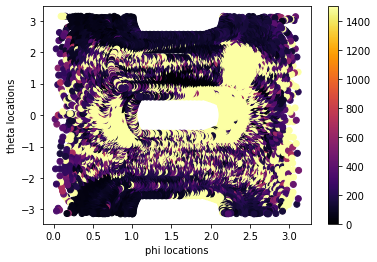

Loading /home/david/dev/SmokeDetectorOptimization/data/long_runs/wall_computer_1_1000_steps


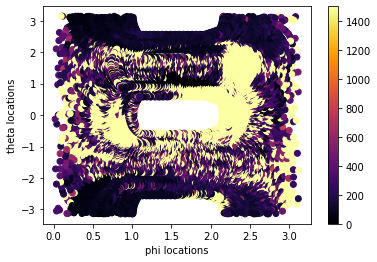

Loading /home/david/dev/SmokeDetectorOptimization/data/long_runs/wall_computer_2_1000_steps


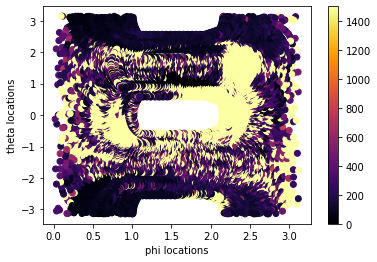

Showing a 3D plot of time to alarm with final locations in green


There were 13040 points


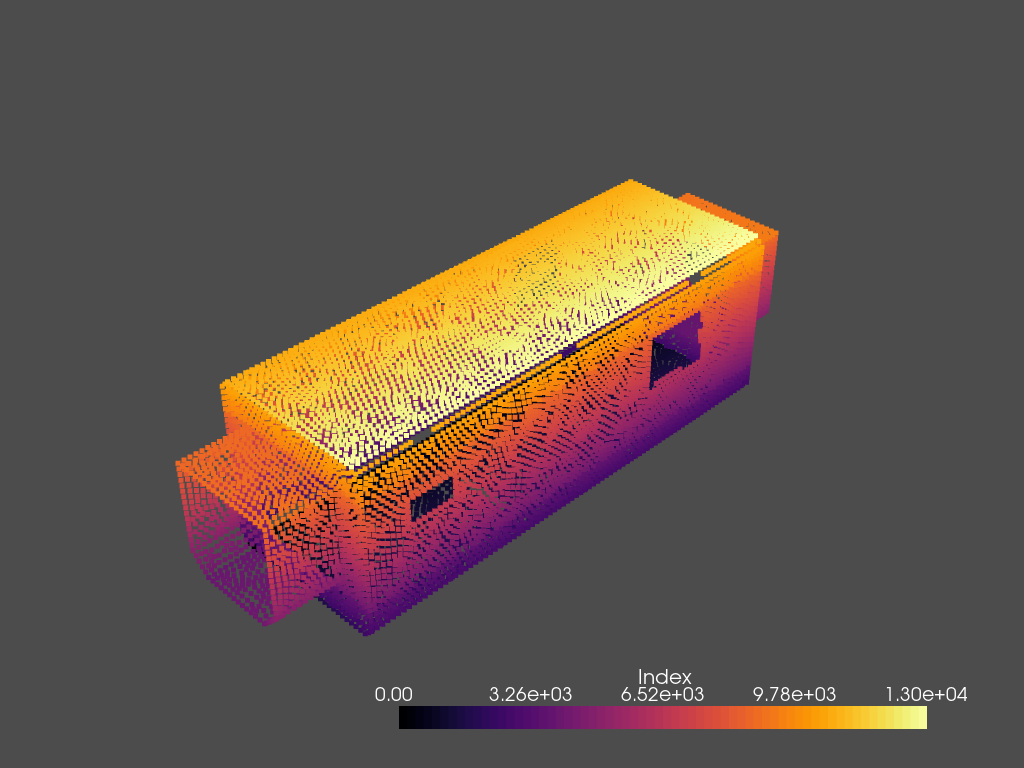

Showing a 3D plot of time to alarm with final locations in green


There were 13040 points


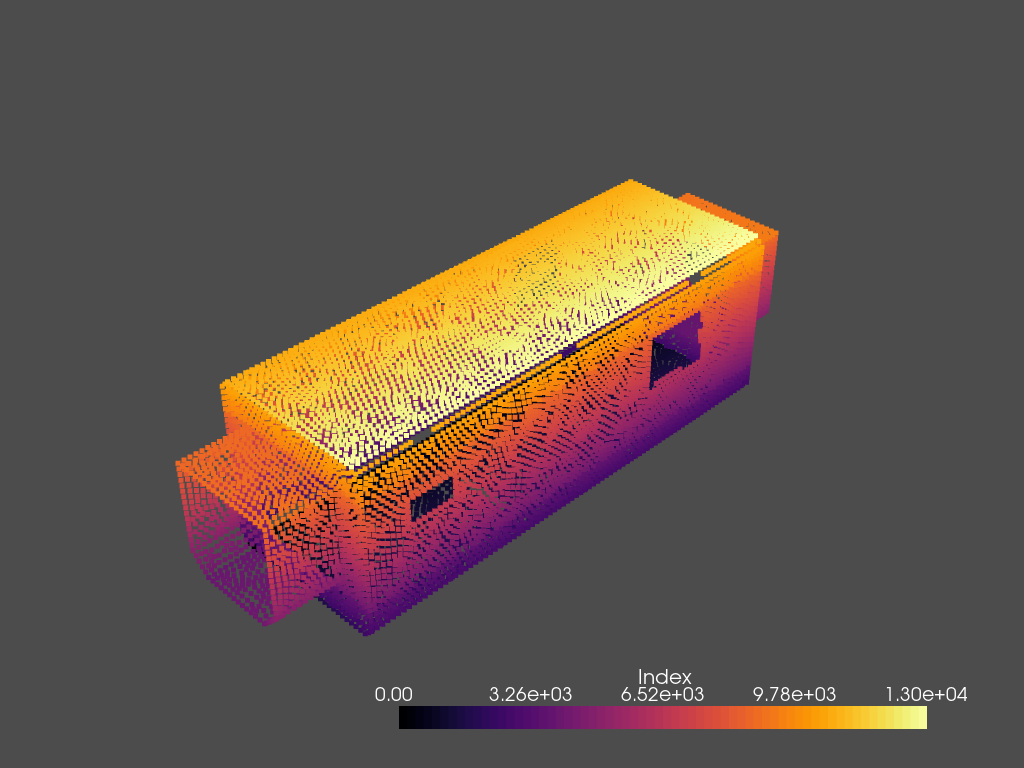

Showing a 3D plot of time to alarm with final locations in green


There were 13040 points


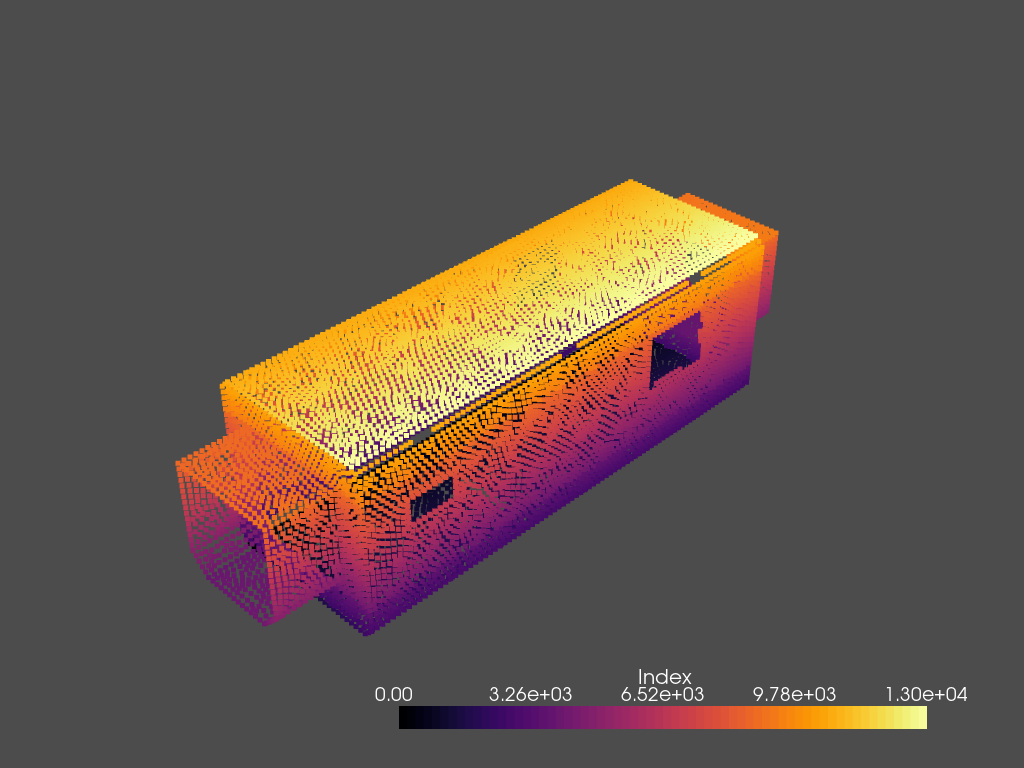

In [4]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
VALIDATE_GEOMETRY=True
VIS = True

sources = []

smoke_source_set = SmokeSourceSet(SMOKE_FOLDERS_LONG,
                                  mesh_file=MESH_FILE,
                                  source_locations=SOURCE_LOCATIONS,
                                  parameterization=PARAMETERIZATION,
                                  validate_geometry=VALIDATE_GEOMETRY,
                                  vis=VIS,
                                  alarm_threshold=ALARM_THRESHOLD)

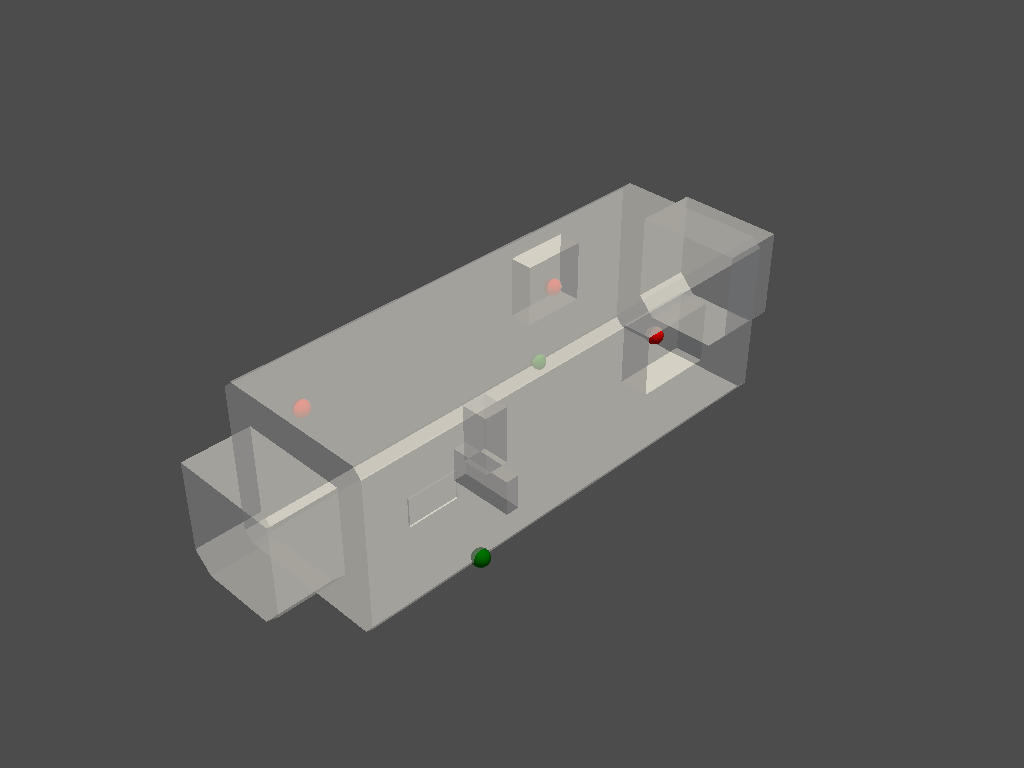

In [5]:
smoke_source_set.visualize_smoke_source(detector_locations=NASA_DETECTORS, plotter=pv.Plotter(),
                                       mesh_opacity=0.7)

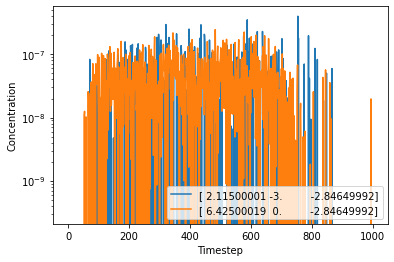

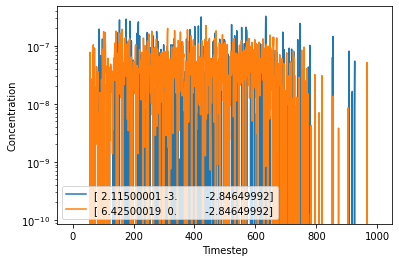

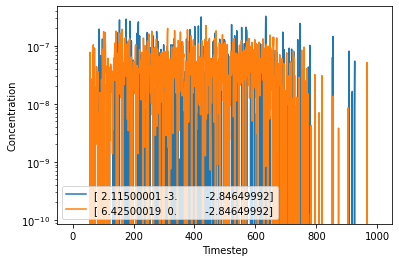

The time to alarm for the NASA sources is 1500.0


In [6]:
sources = smoke_source_set.source_list()
time_to_alarm = evaluate_locations(NASA_DETECTORS, sources, function_type=FUNCTION_TYPE)
print(f"The time to alarm for the NASA sources is {time_to_alarm}")

In [7]:
import numpy as np
print(sources[0].XYZ)
print(sources[1].XYZ)
print(np.allclose(sources[0].XYZ, sources[1].XYZ))

[[ 0.         -2.84649992 -3.        ]
 [ 0.100625   -2.84649992 -3.        ]
 [ 0.20125    -2.84649992 -3.        ]
 ...
 [ 8.33013344 -0.15350001  0.        ]
 [ 8.43506622 -0.15350001  0.        ]
 [ 8.53999996 -0.15350001  0.        ]]
[[ 0.         -2.84649992 -3.        ]
 [ 0.100625   -2.84649992 -3.        ]
 [ 0.20125    -2.84649992 -3.        ]
 ...
 [ 8.33013344 -0.15350001  0.        ]
 [ 8.43506622 -0.15350001  0.        ]
 [ 8.53999996 -0.15350001  0.        ]]
True
